In [1]:
! pip install modisco-lite
!pip install vizsequence

from google.colab import output
output.clear()

In [2]:
import modiscolite
import vizsequence

In [3]:
import numpy as np
import sys
import os
import torch
import h5py as h5
import matplotlib.pyplot as plt

from collections import OrderedDict
from importlib import reload

#import dmslogo
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import torch.nn as nn
import torch.nn.functional as F

from tqdm.auto import tqdm
tqdm.pandas()

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## TF-Mo-DISco on BODA test set

In [ ]:
contributions_dict = torch.load('/content/drive/MyDrive/data/BODA/boda2_test__extended_contributions_dict.pt')
#random_contributions_dict = torch.load('/content/drive/MyDrive/data/Modisco/random_sequences__contributions_dict.pt')

batch_dict = contributions_dict['batch_length_200']
task_names = ['K562', 'HepG2', 'SKNSH']

#----------- filter by specificity ---------------
# overmax_cutoff = 0.6
# target_cell_idx = 2

# non_target_cell_idxs = [0, 1, 2]
# non_target_cell_idxs.remove(target_cell_idx)

# predictions = batch_dict['pred_lfc'][batch_dict['idxs'], :]
# overmax_scores = predictions[:,target_cell_idx] - predictions[:,non_target_cell_idxs].max(dim=-1).values
# filtered_idxs = torch.where(overmax_scores >= overmax_cutoff)[0].tolist()
# print(len(filtered_idxs))
#------------------------------------------------------------

#----------- filter by repression ---------------
activity = -0.35
target_cell_idx = 0

predictions = batch_dict['pred_lfc'][batch_dict['idxs'], :]
filtered_idxs = torch.where(predictions[:,target_cell_idx] < activity)[0].tolist()
print(len(filtered_idxs))
#------------------------------------------------------------

one = batch_dict['batch'][filtered_idxs, ...].numpy()
hypscores = batch_dict['K562_contrib_ext'][filtered_idxs, ...].numpy()

np.savez('ohe.npz', one)
np.savez('hypscores.npz', hypscores)

1759


In [ ]:
%%time
!modisco motifs -s ohe.npz -a hypscores.npz -n 2000 -o modisco_results.h5 -w 200

CPU times: user 690 ms, sys: 88.6 ms, total: 779 ms
Wall time: 1min 24s


Positive patterns:


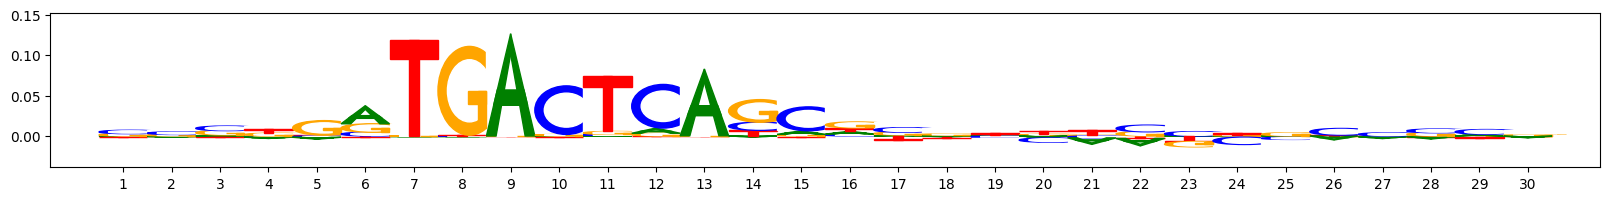

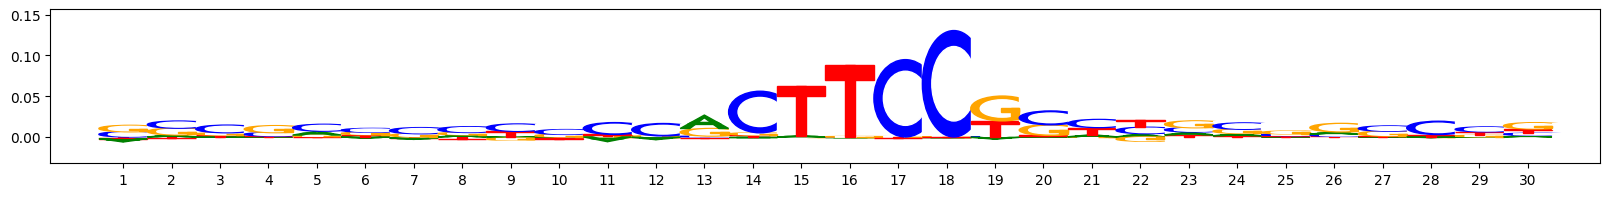

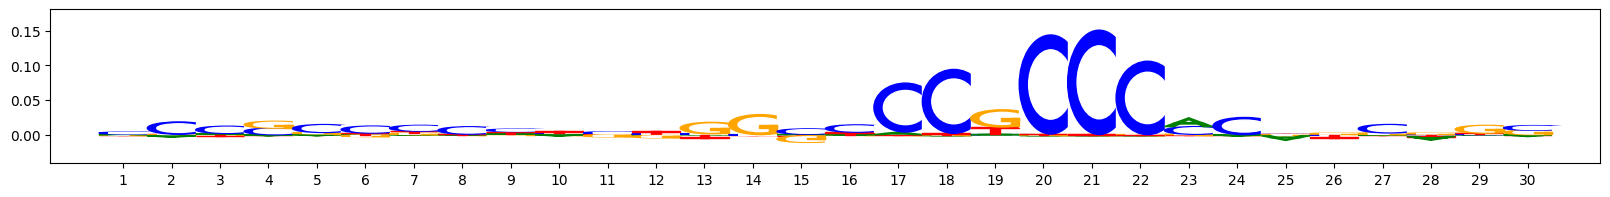

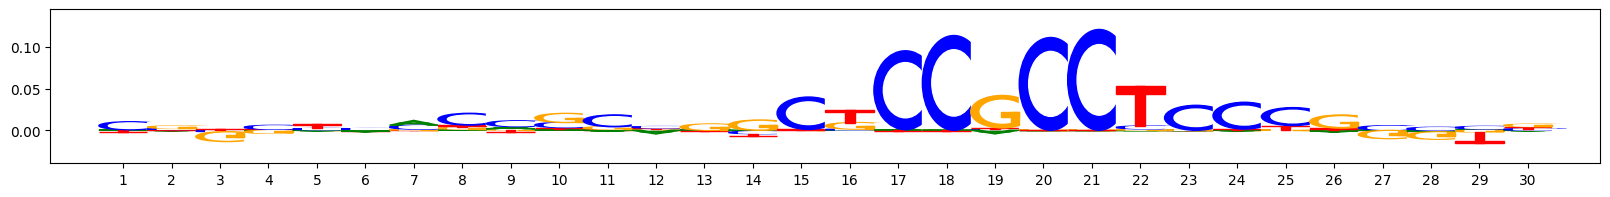

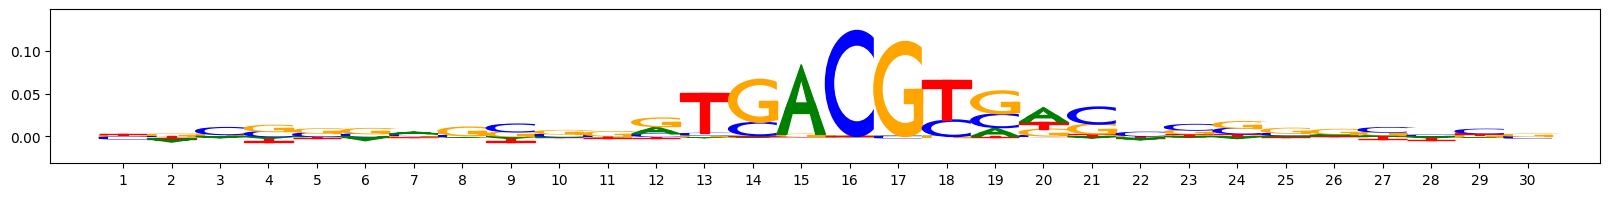

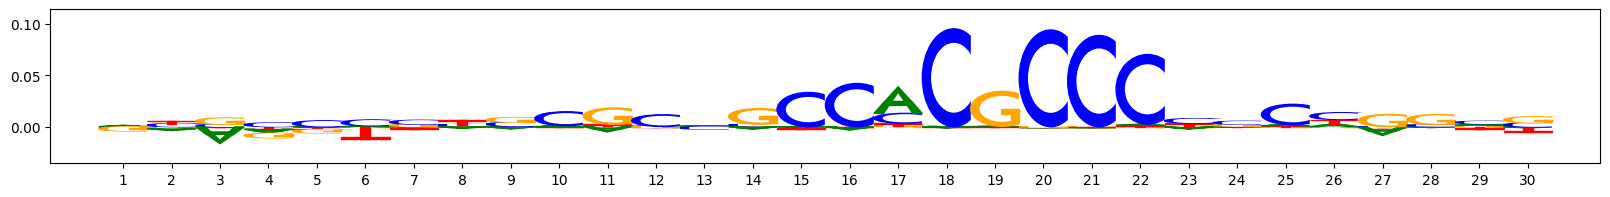

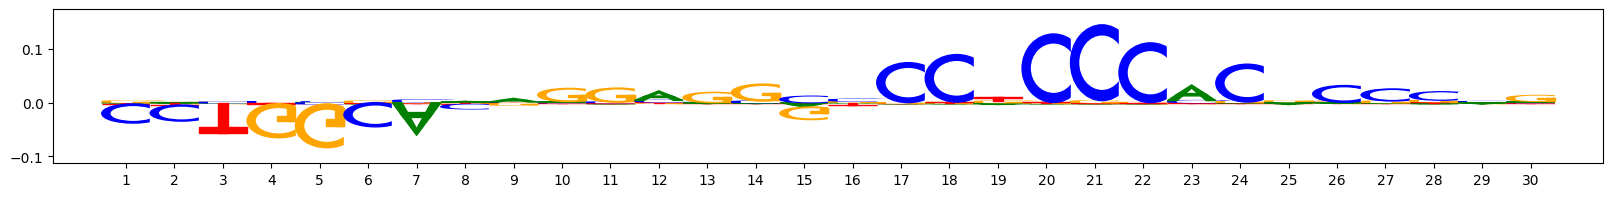

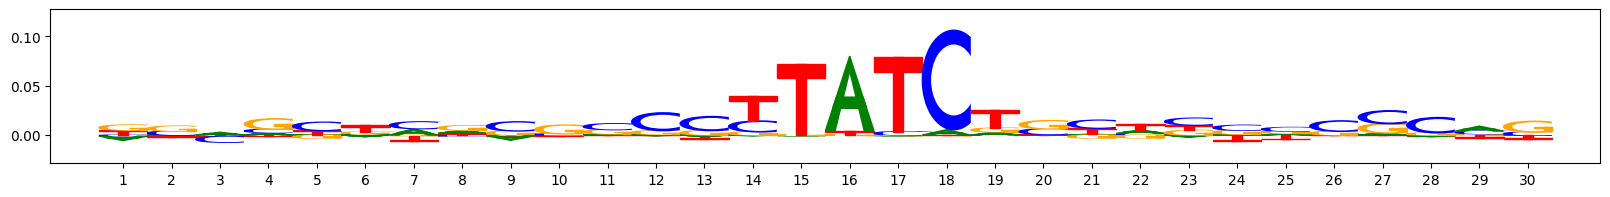

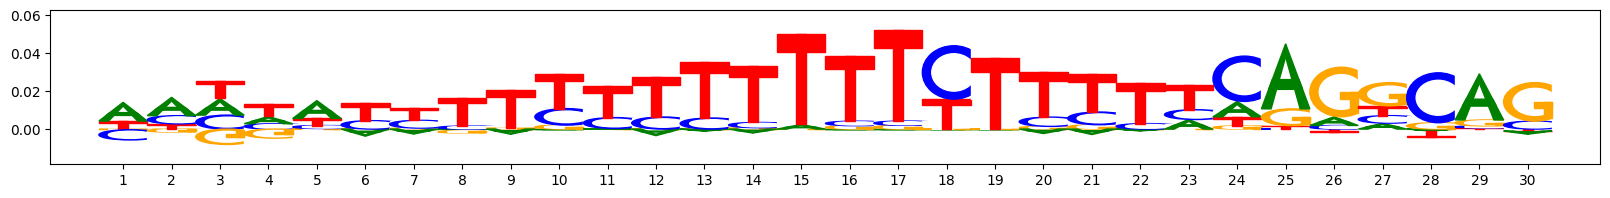

Negative patterns:


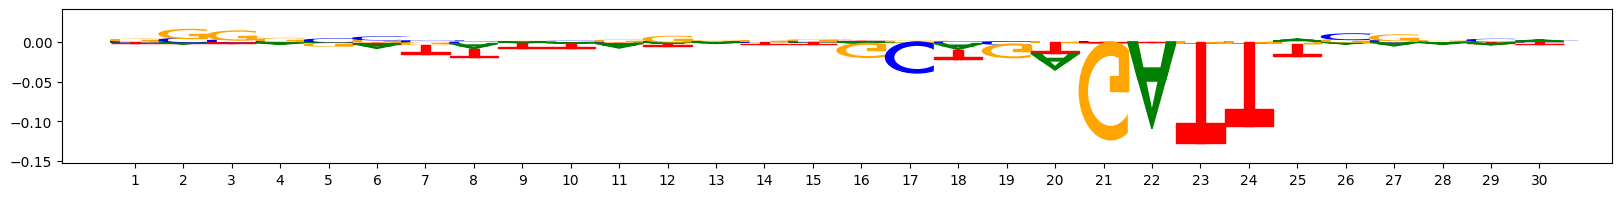

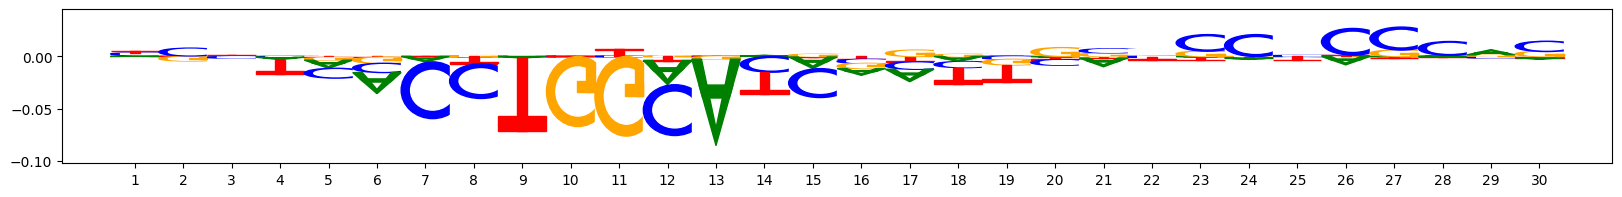

In [ ]:
%matplotlib inline
fh = h5.File("modisco_results.h5")

print('Positive patterns:')
try:
    for akey in fh['pos_patterns'].keys():
        vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
except:
    print('No positive patterns')

print('Negative patterns:')
try:
    for akey in fh['neg_patterns'].keys():
        vizsequence.plot_weights(fh['neg_patterns'][akey]['contrib_scores'])
except:
    print('No negative patterns')

fh.close()

In [ ]:
!modisco report -i modisco_results1.h5 -o report/ -s report/

In [ ]:
from IPython.display import HTML
HTML('report/motifs.html')

## CODA library

In [4]:
onehots_dict = torch.load('/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_onehots.pt')

### K562

In [ ]:
cell_type = 'K562'

contributions_dict = torch.load(f'/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_contributions_{cell_type}.pt')

one = onehots_dict['onehots'].numpy()
hypscores = contributions_dict['hyp_contributions'].numpy()

np.savez('ohe.npz', one)
np.savez('hypscores.npz', hypscores)

In [ ]:
%%time
!modisco motifs -s ohe.npz -a hypscores.npz -n 1000000 -o /content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_K562_v1M.h5 -w 200

CPU times: user 2min 18s, sys: 19 s, total: 2min 37s
Wall time: 5h 27min 34s


Positive patterns:


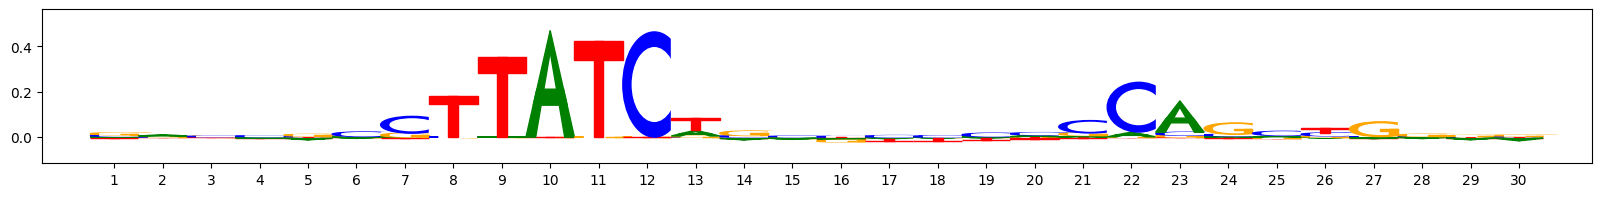

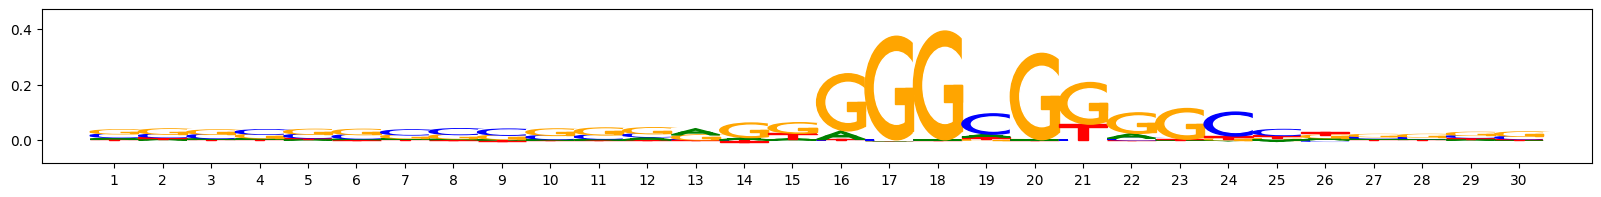

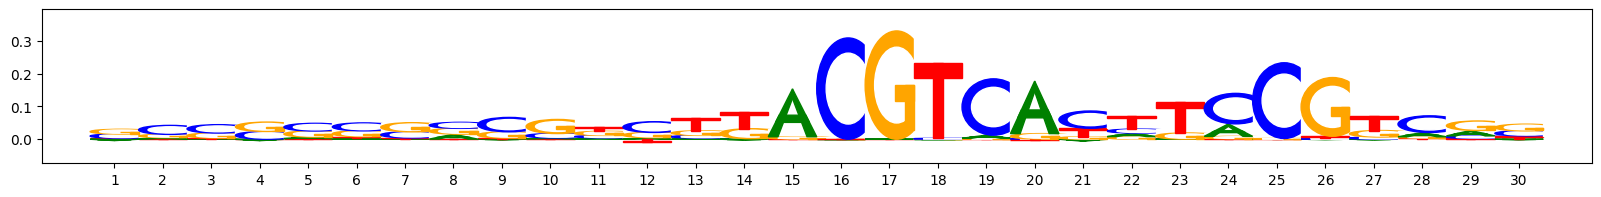

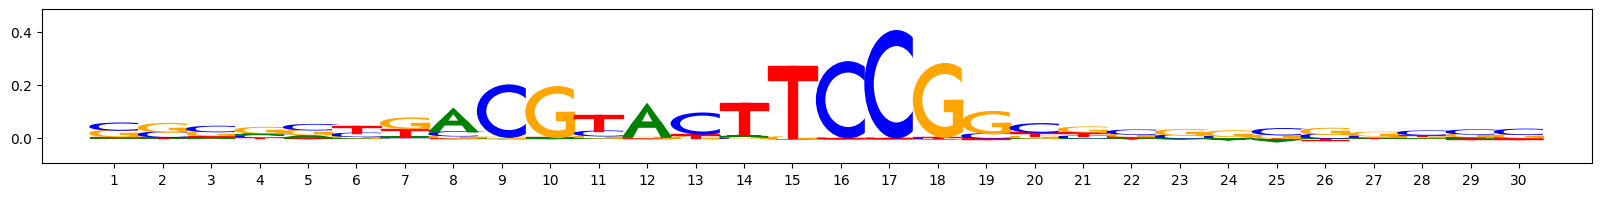

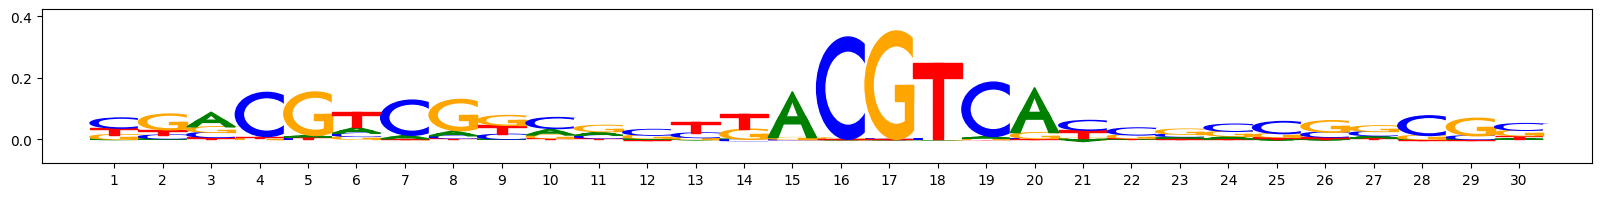

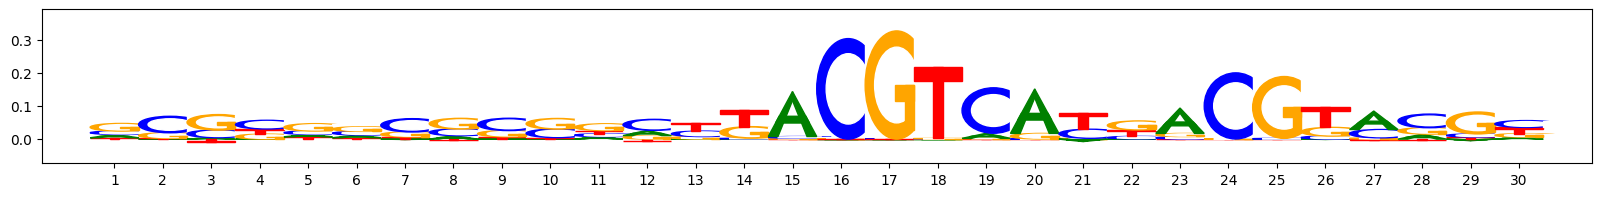

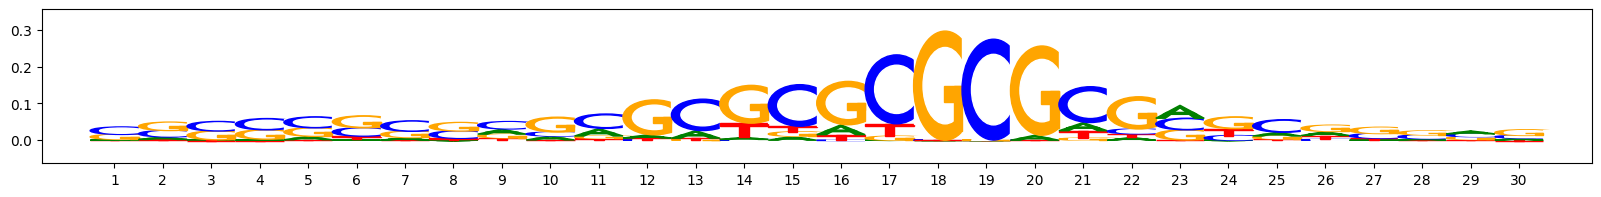

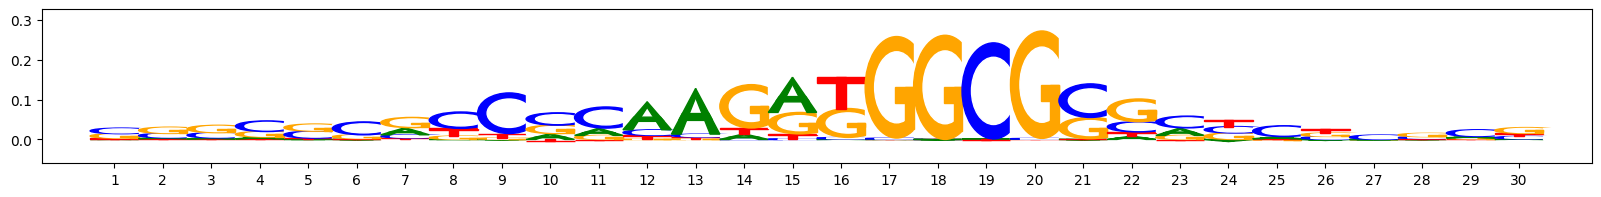

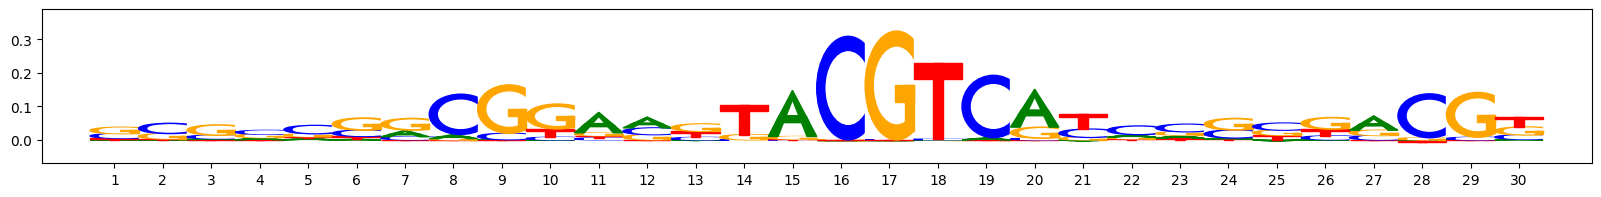

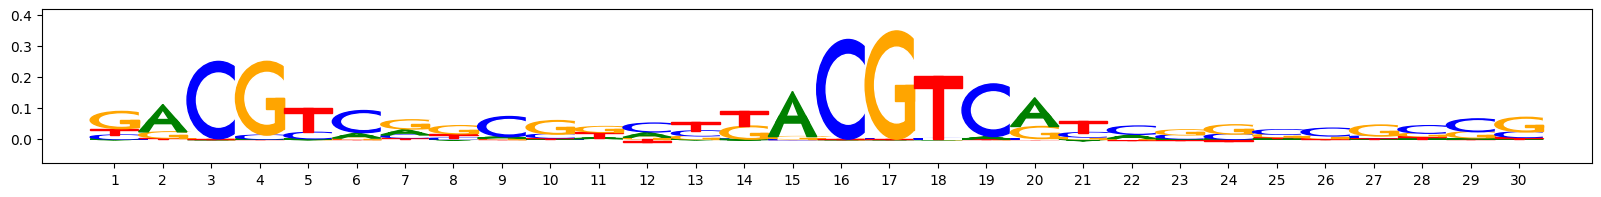

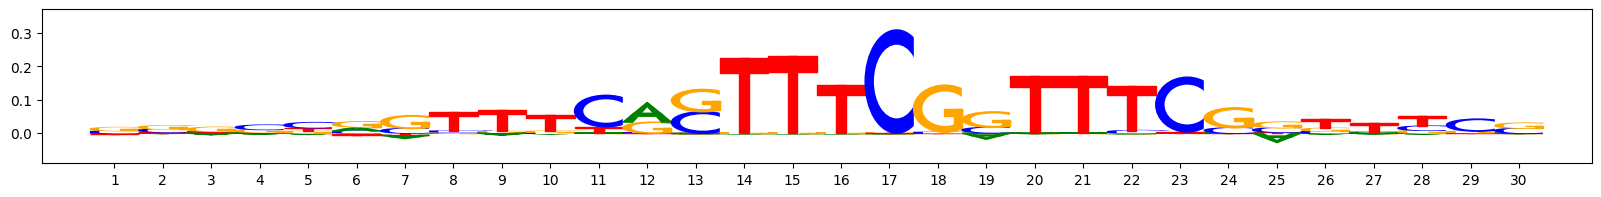

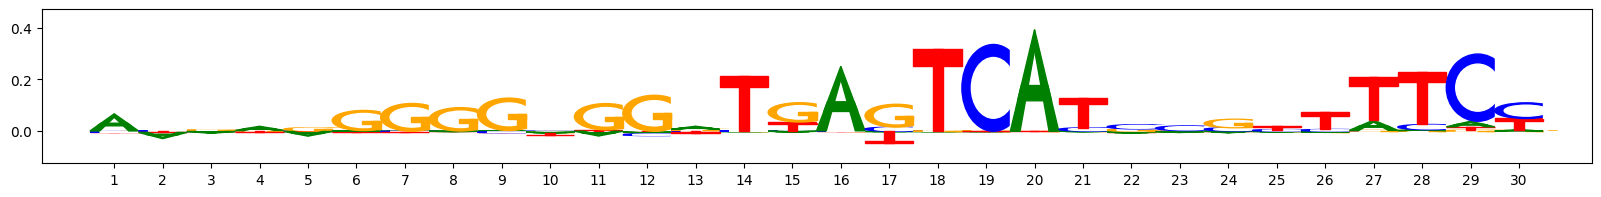

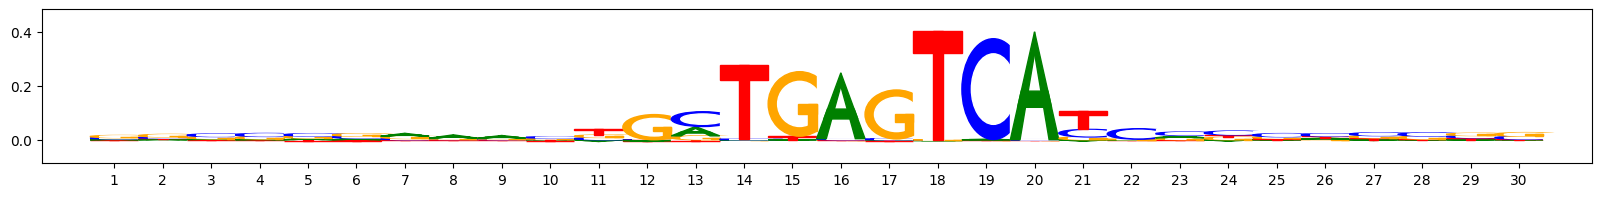

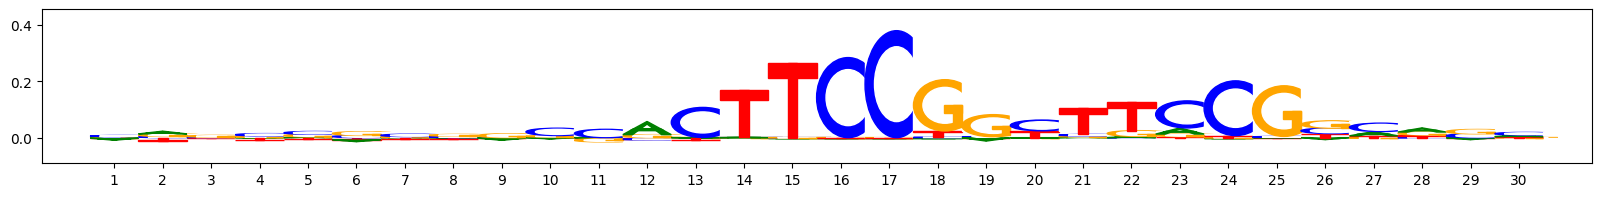

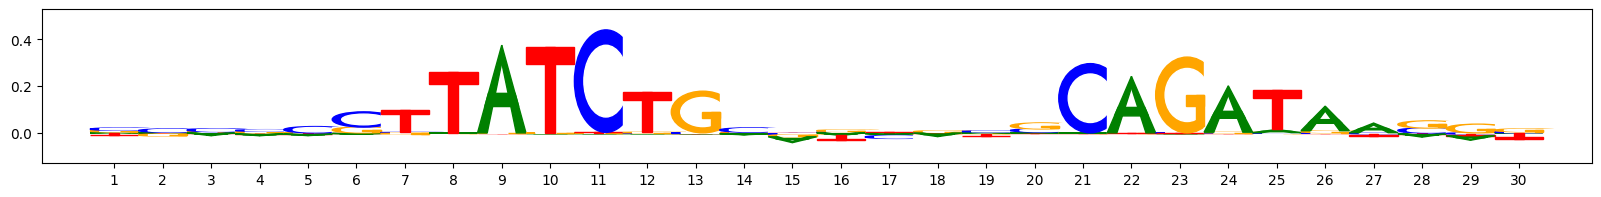

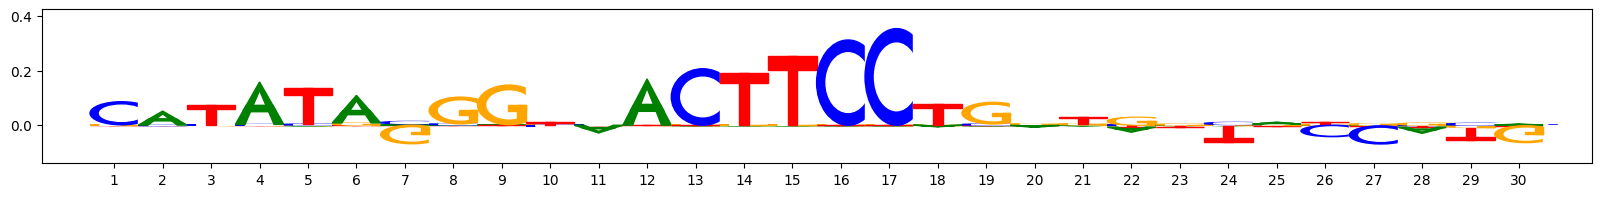

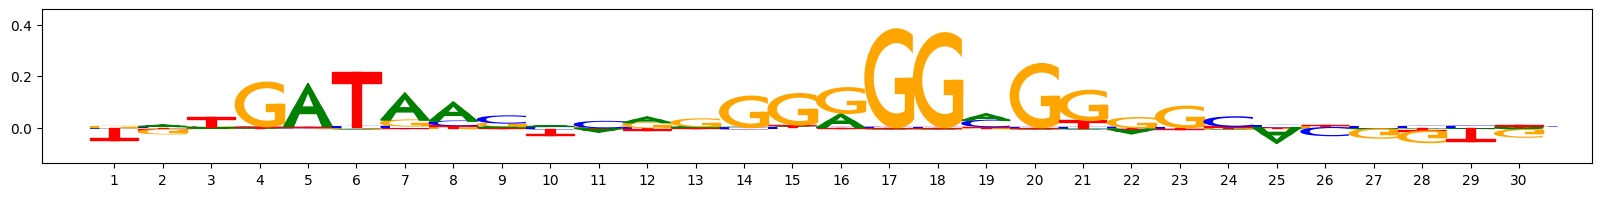

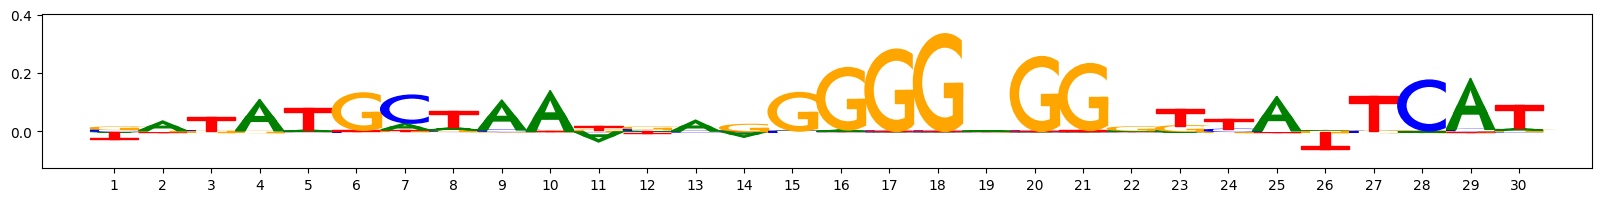

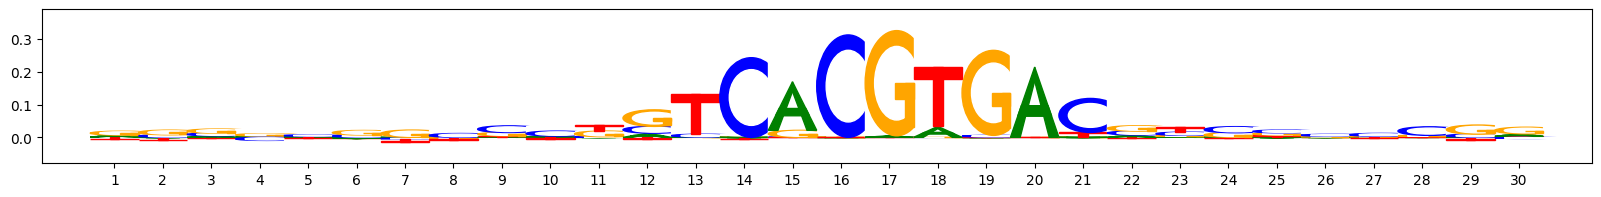

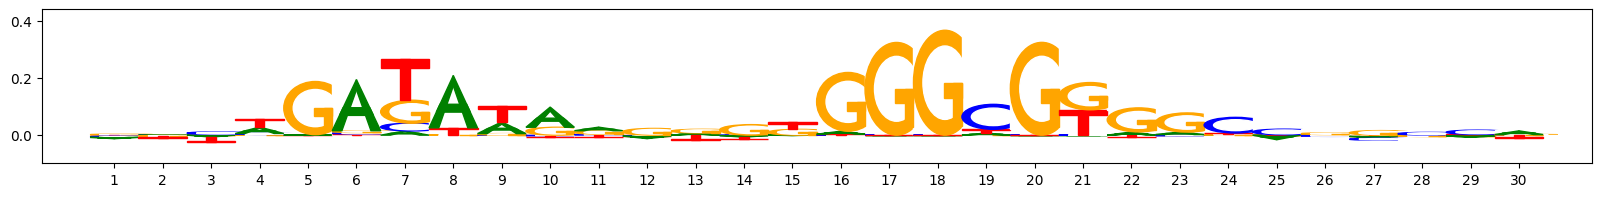

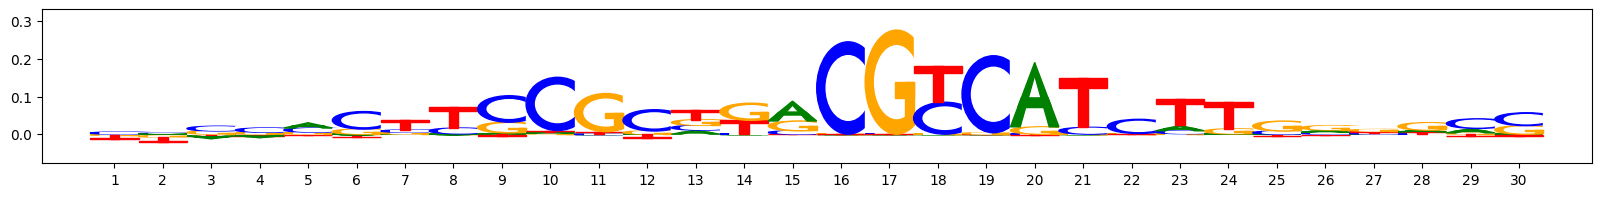

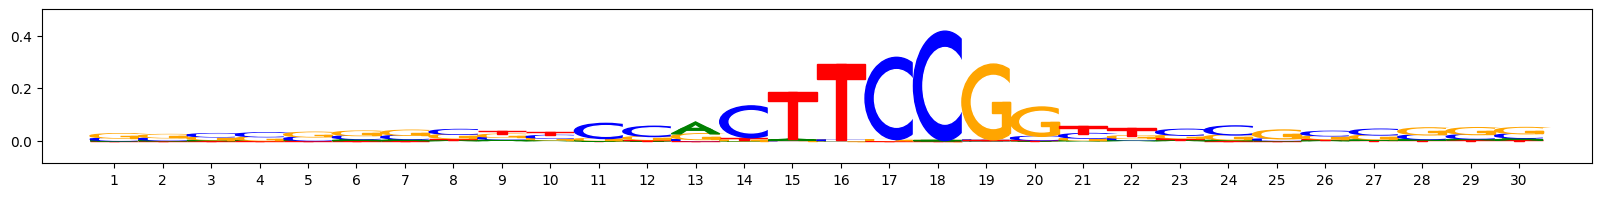

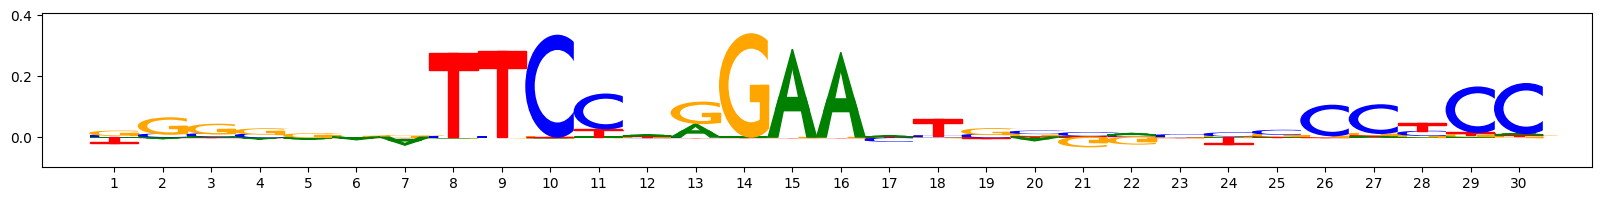

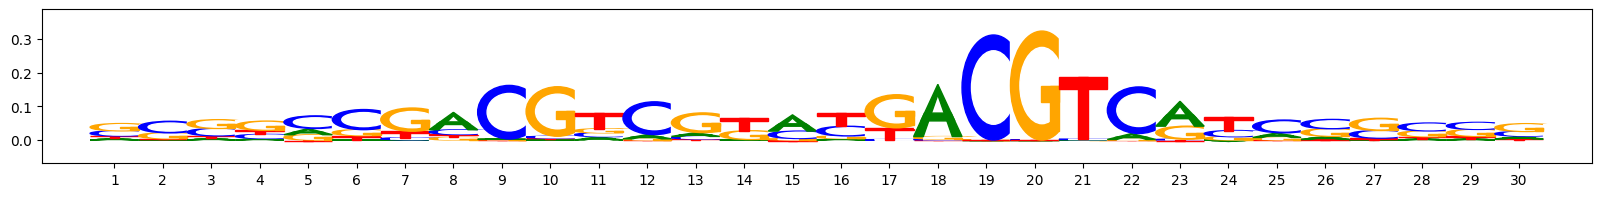

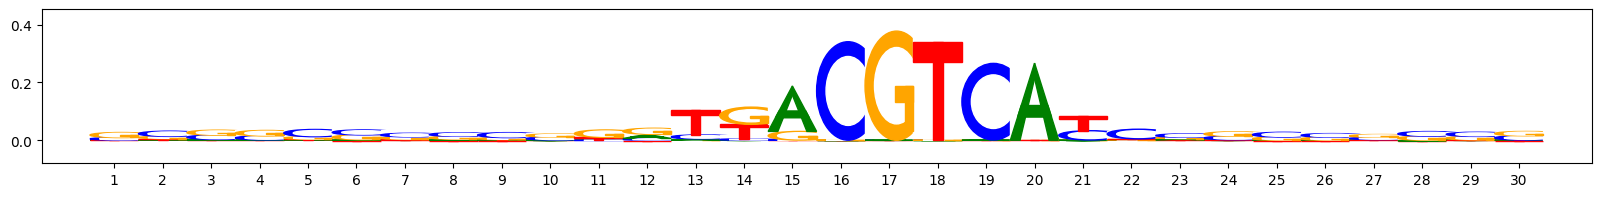

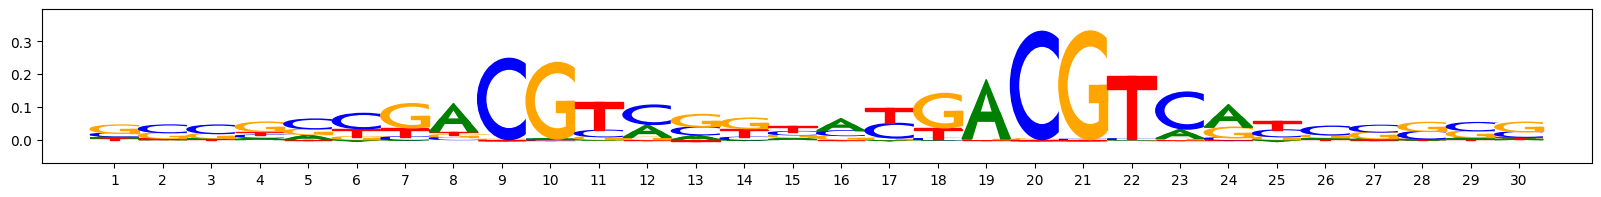

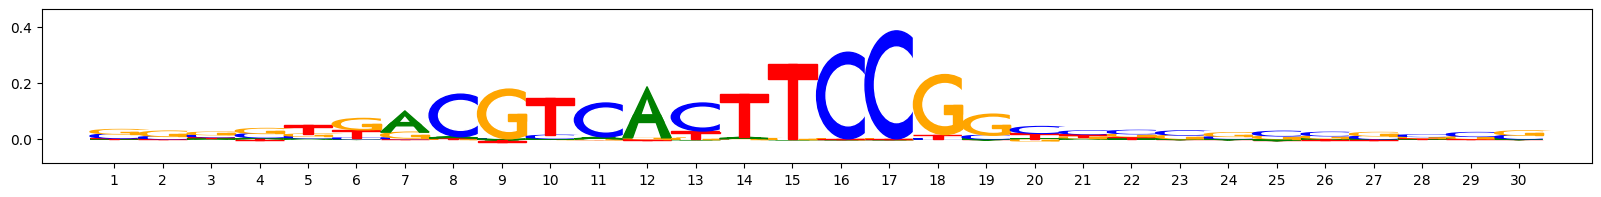

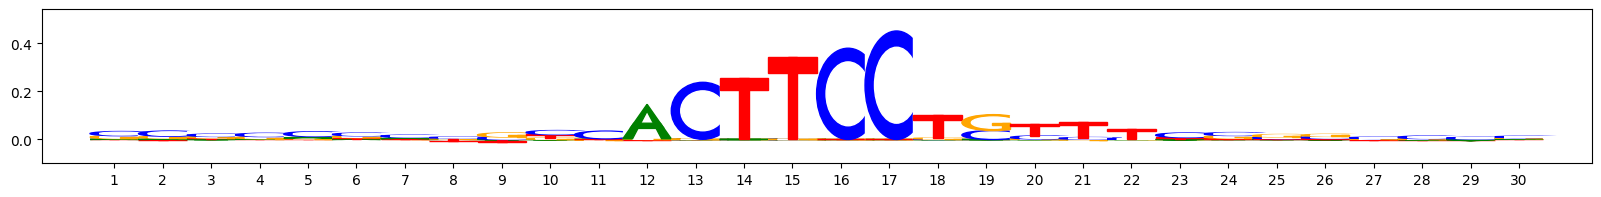

Negative patterns:


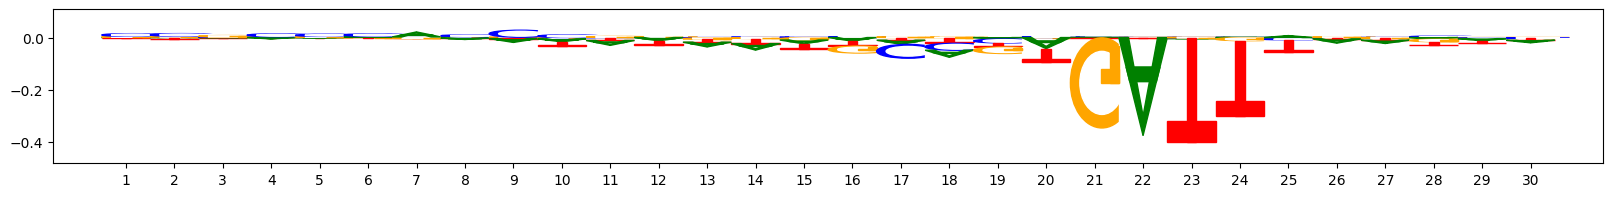

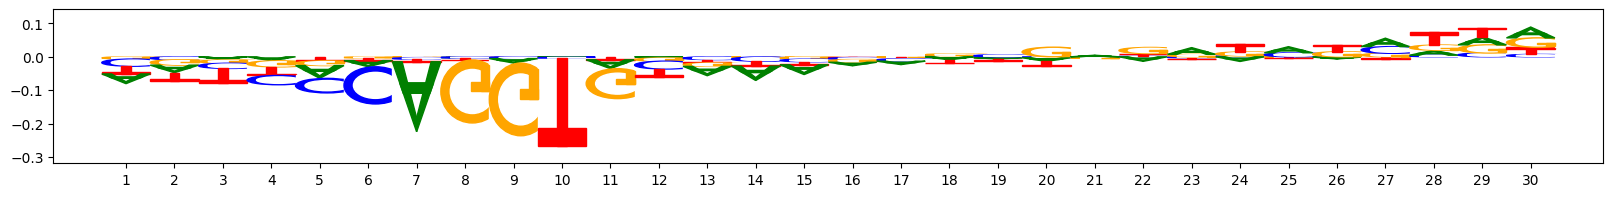

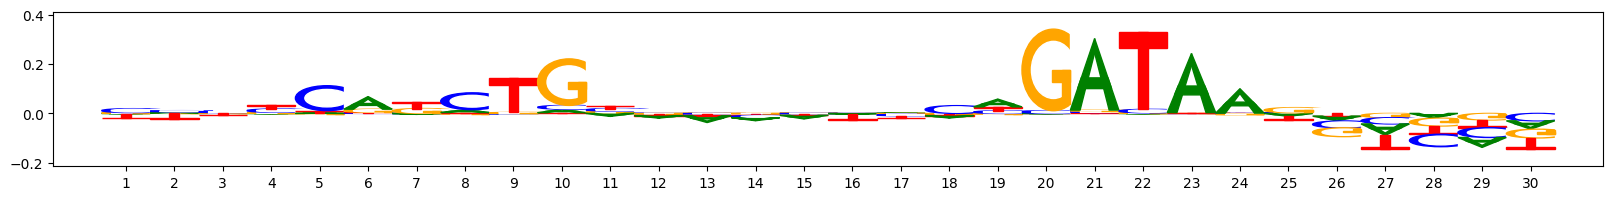

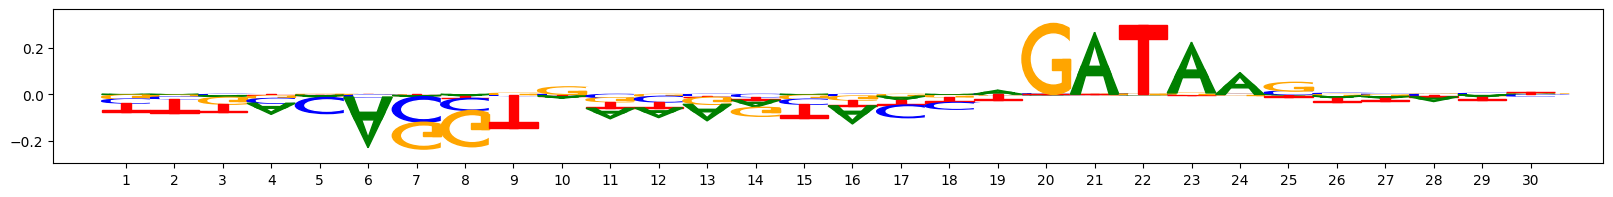

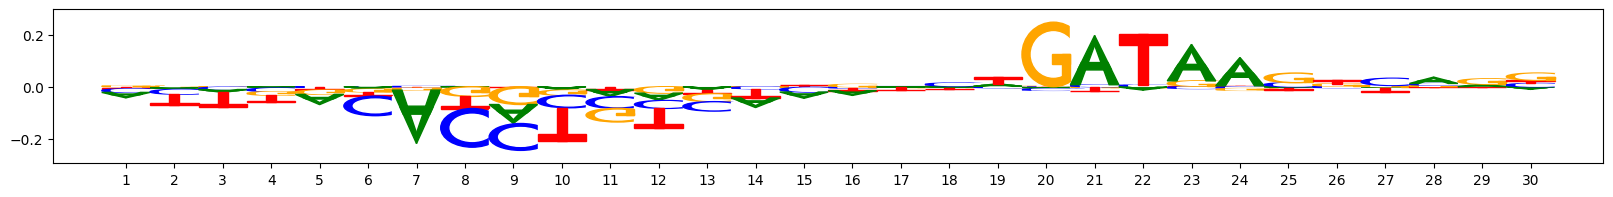

In [ ]:
%matplotlib inline
fh = h5.File("/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_K562.h5")

print('Positive patterns:')
try:
    for akey in fh['pos_patterns'].keys():
        vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
except:
    print('No positive patterns')

print('Negative patterns:')
try:
    for akey in fh['neg_patterns'].keys():
        vizsequence.plot_weights(fh['neg_patterns'][akey]['contrib_scores'])
except:
    print('No negative patterns')

fh.close()

### HepG2

In [5]:
cell_type = 'HepG2'

contributions_dict = torch.load(f'/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_contributions_{cell_type}.pt')

one = onehots_dict['onehots'].numpy()
hypscores = contributions_dict['hyp_contributions'].numpy()

np.savez('ohe.npz', one)
np.savez('hypscores.npz', hypscores)

In [6]:
%%time
!modisco motifs -s ohe.npz -a hypscores.npz -n 1000000 -o /content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_HepG2_v1M.h5 -w 200

CPU times: user 1min 31s, sys: 14.3 s, total: 1min 45s
Wall time: 3h 51min 21s


Positive patterns:


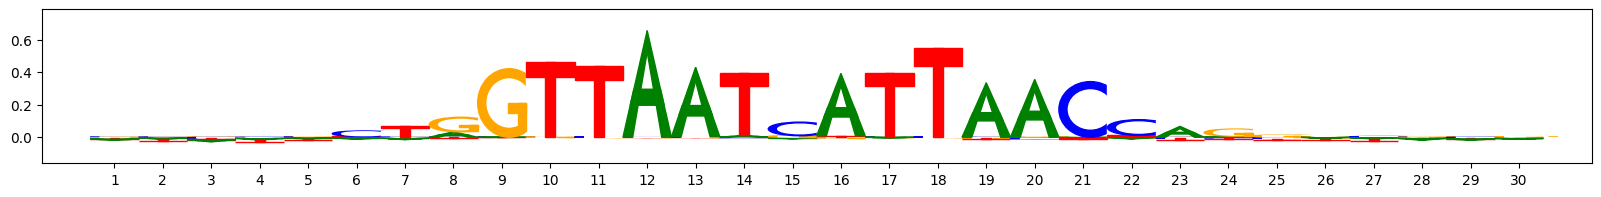

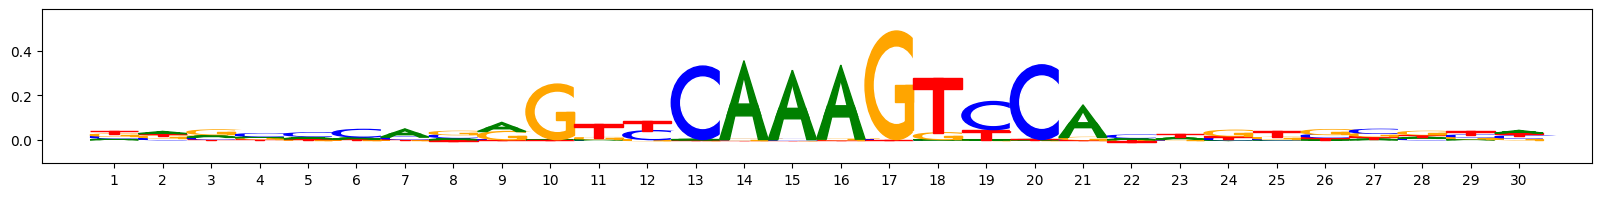

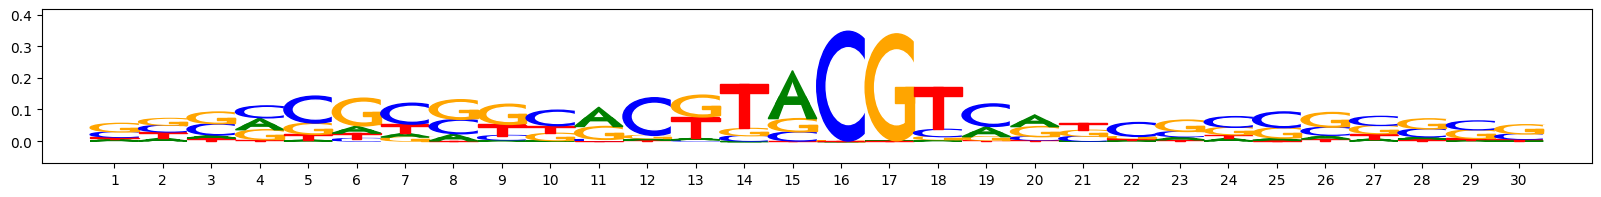

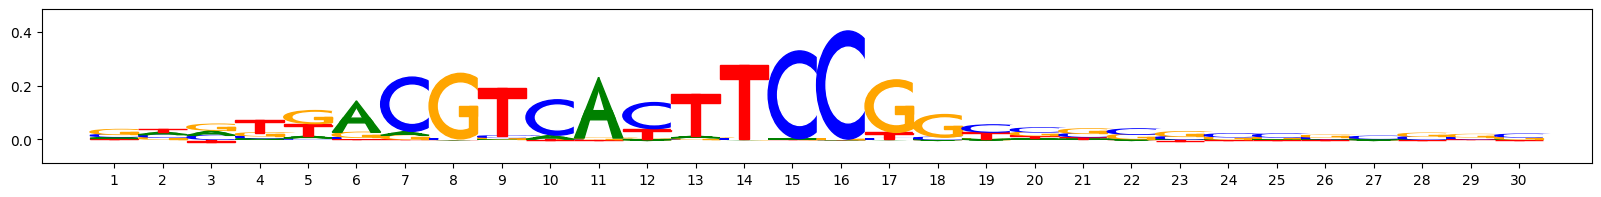

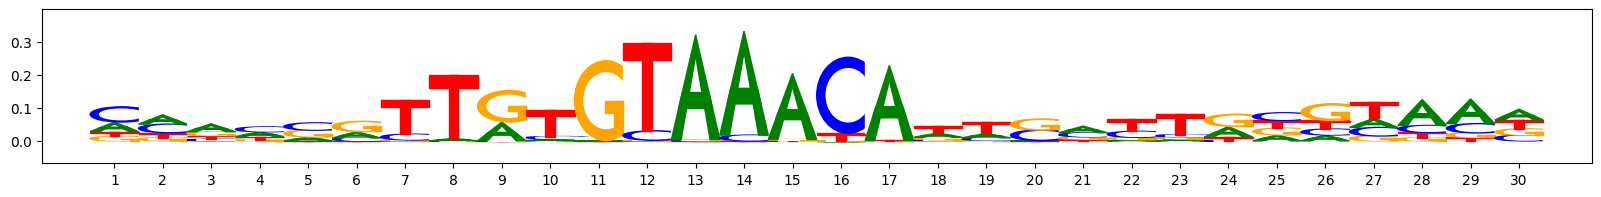

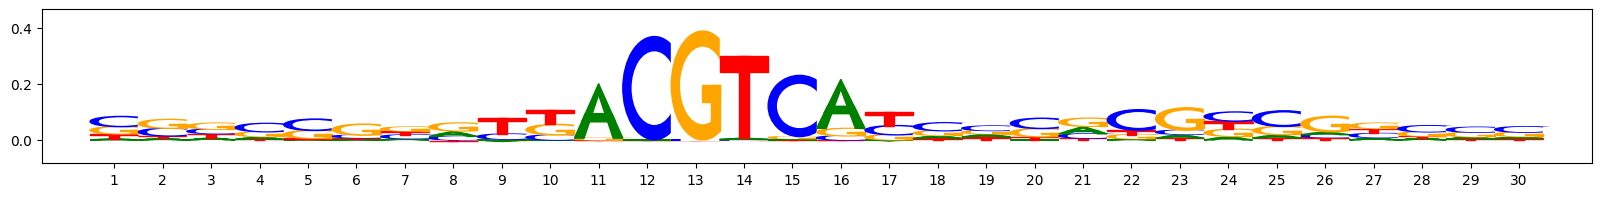

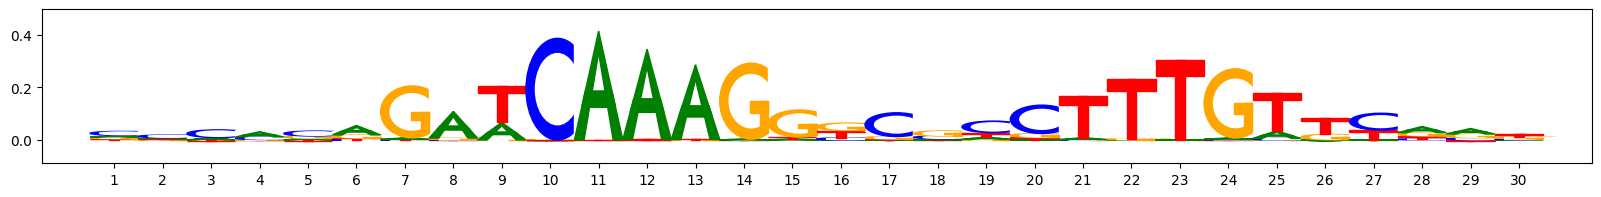

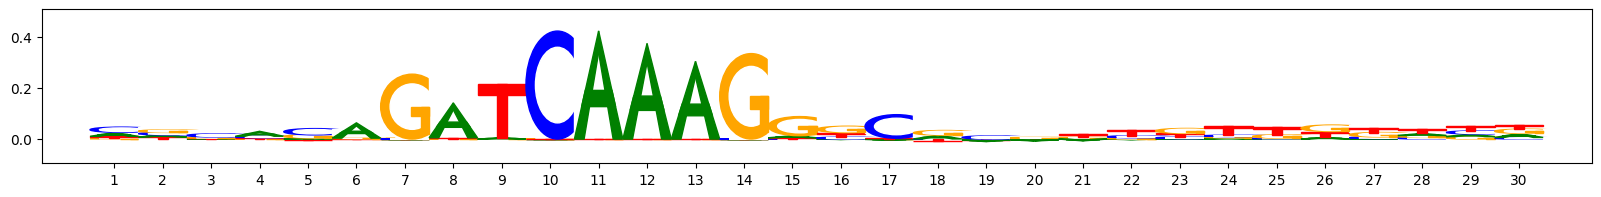

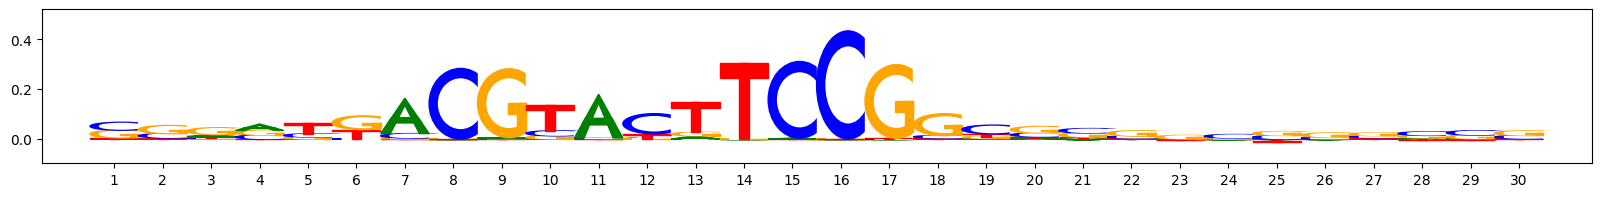

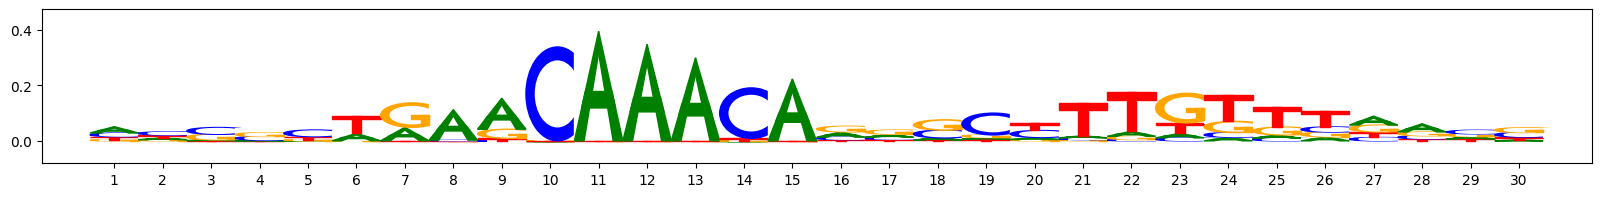

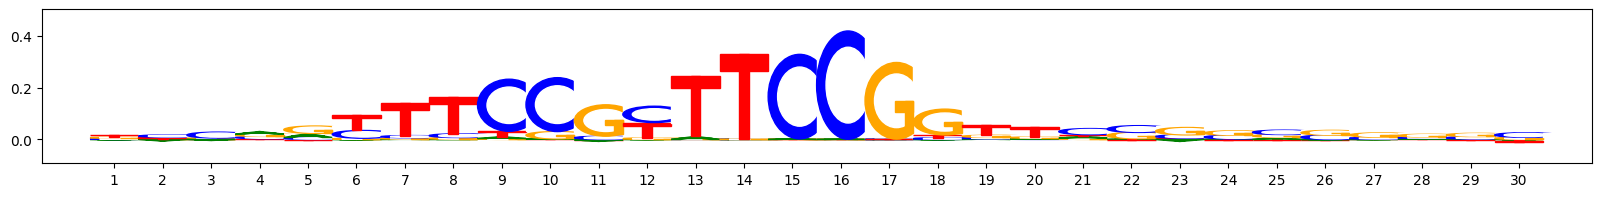

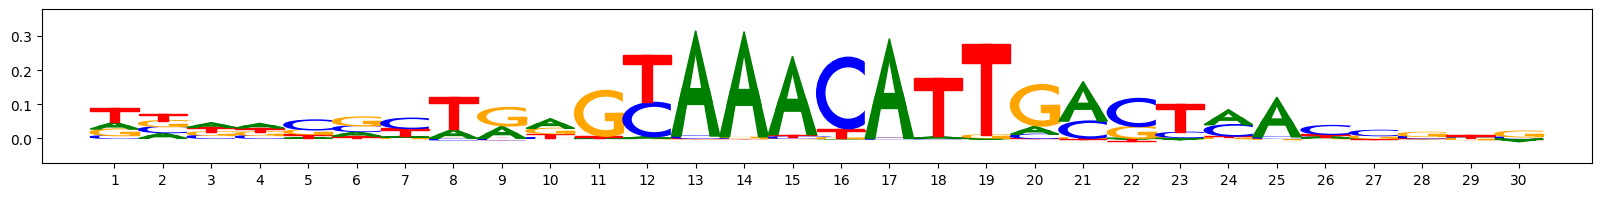

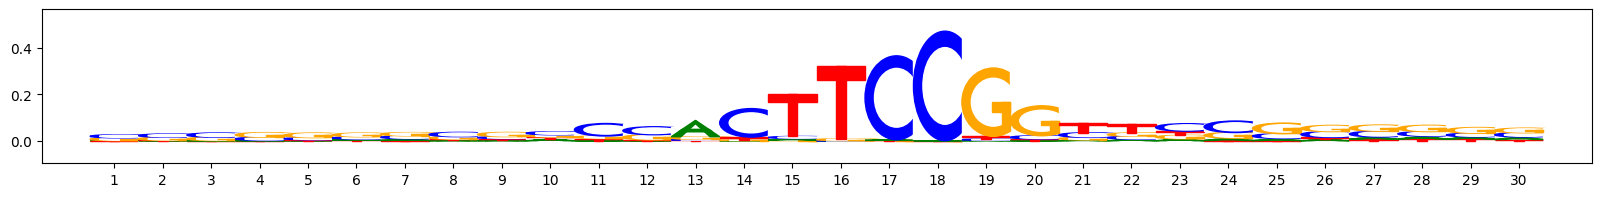

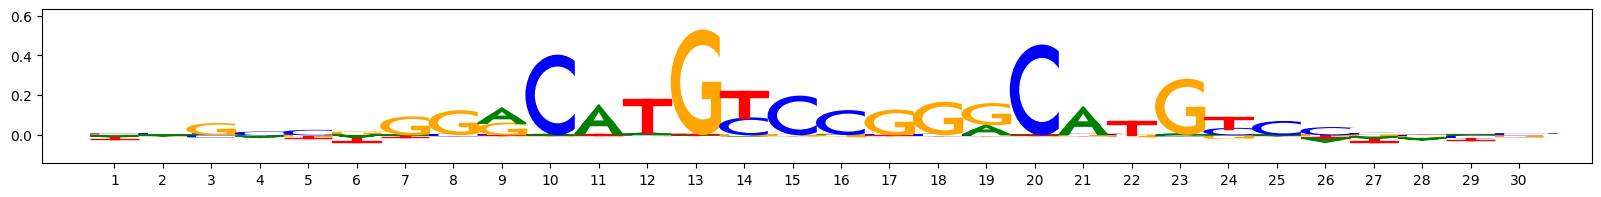

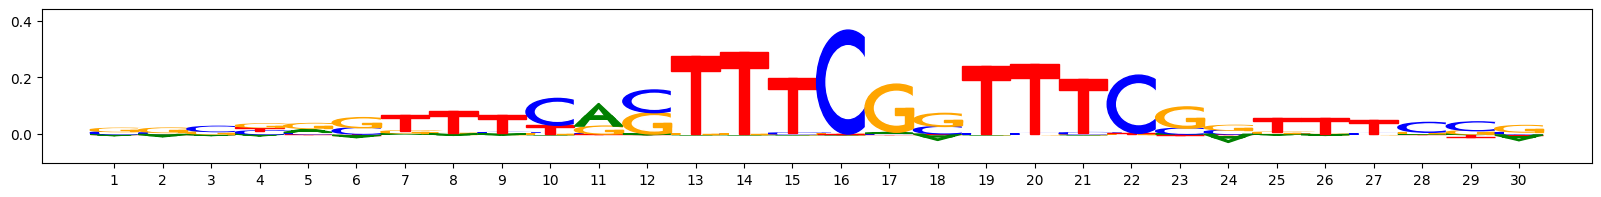

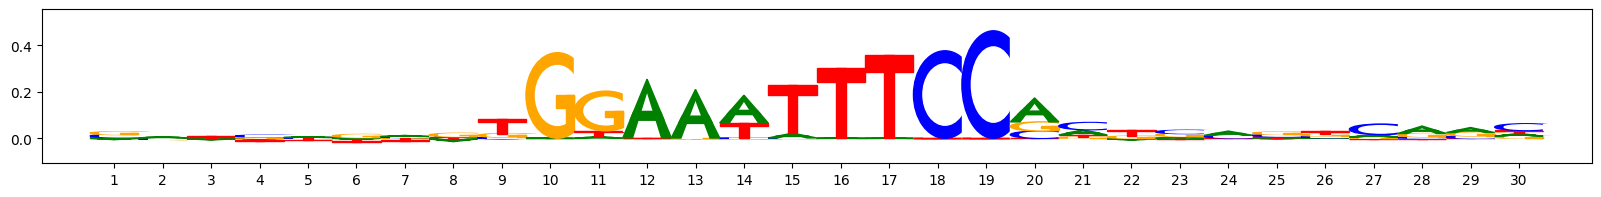

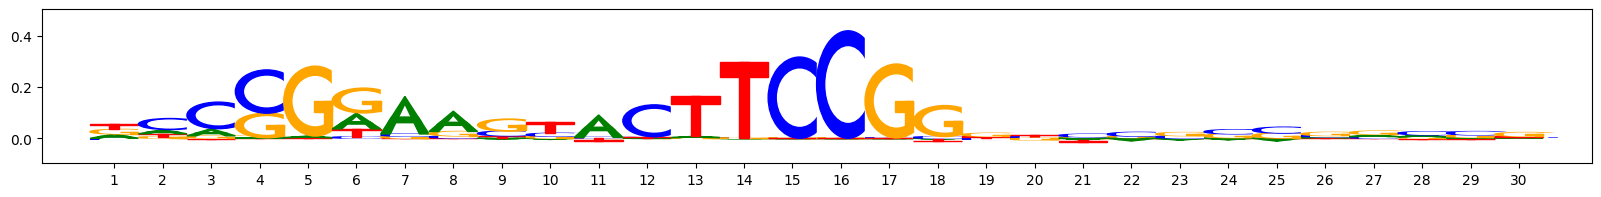

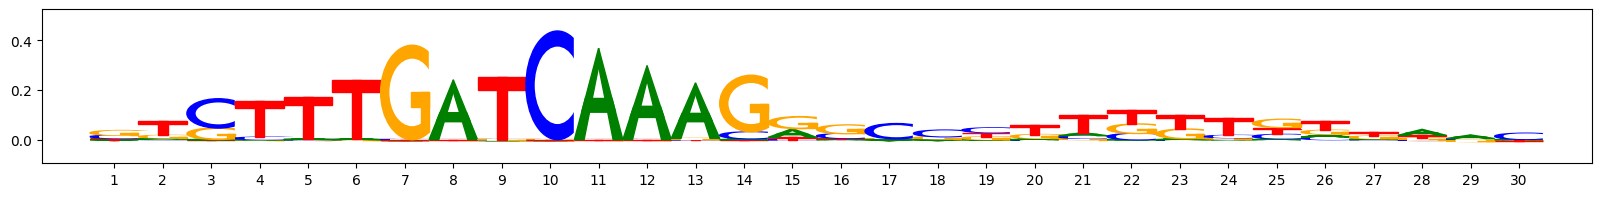

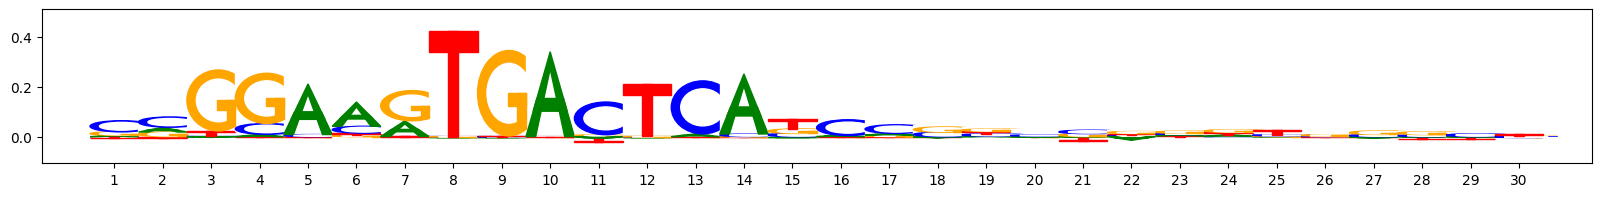

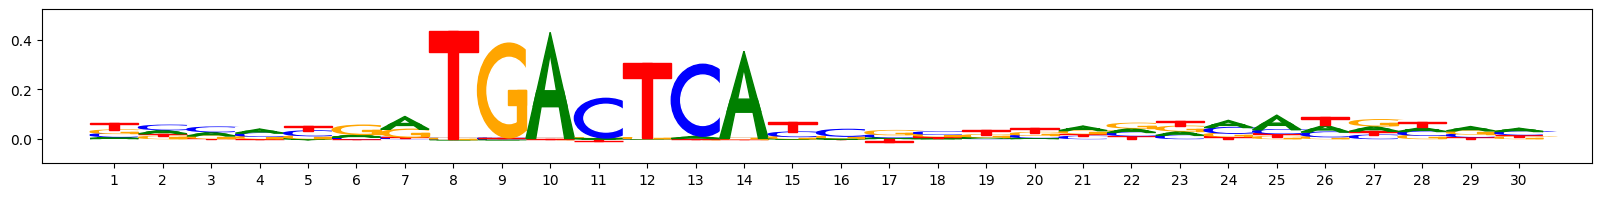

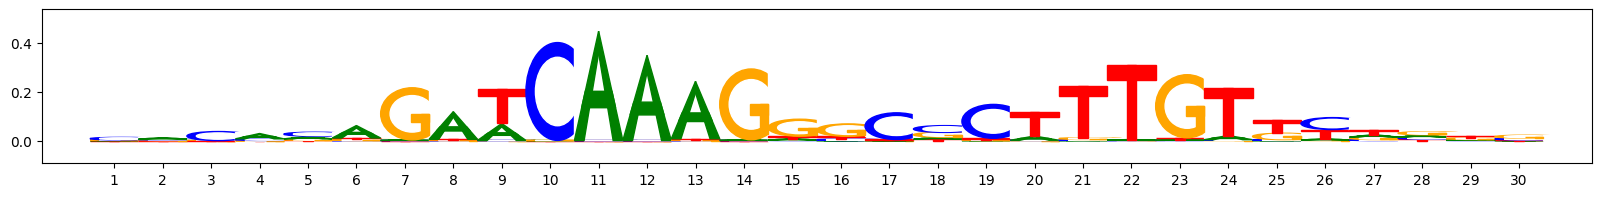

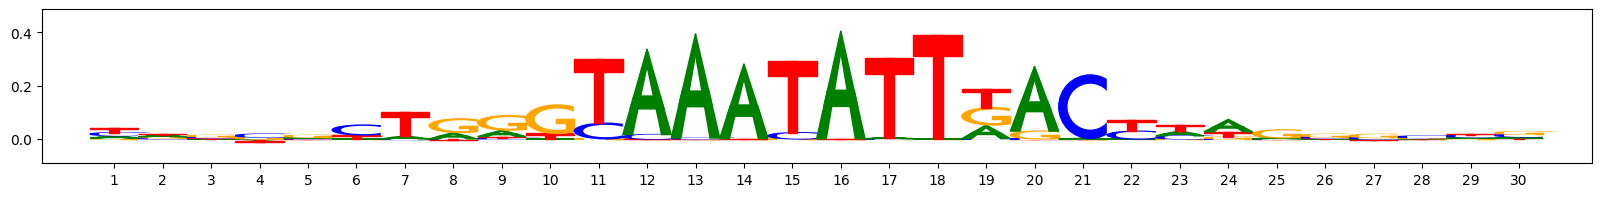

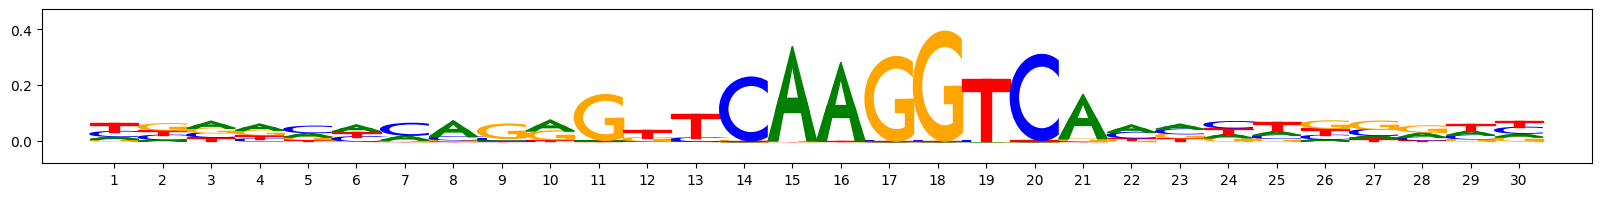

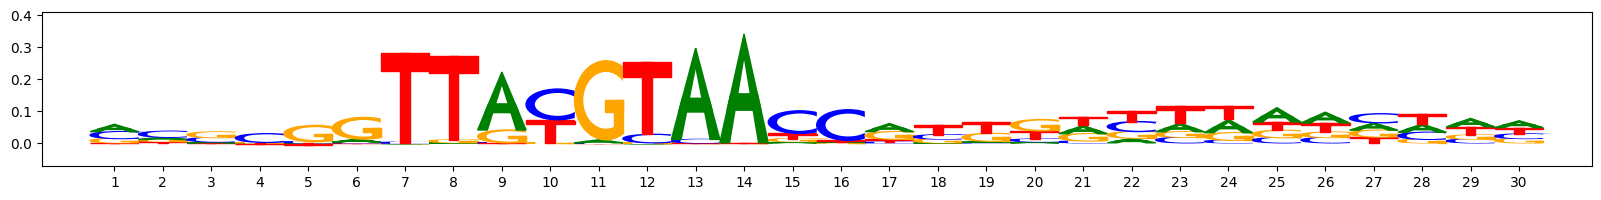

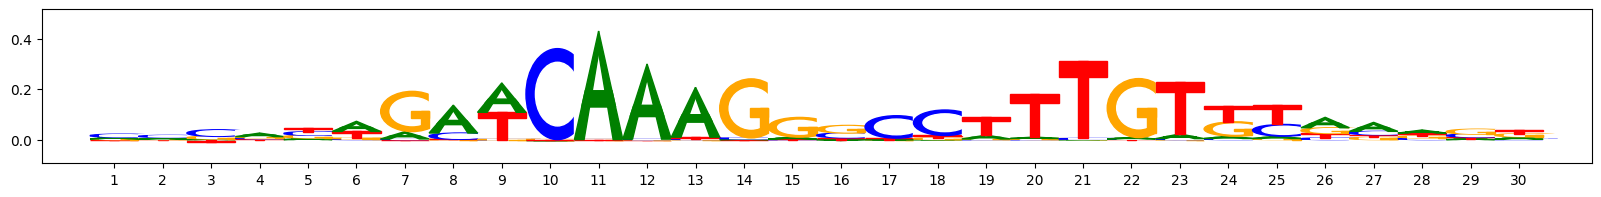

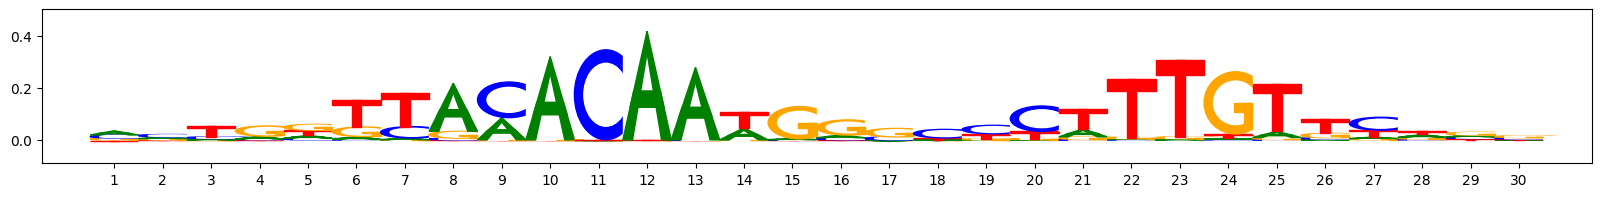

Negative patterns:


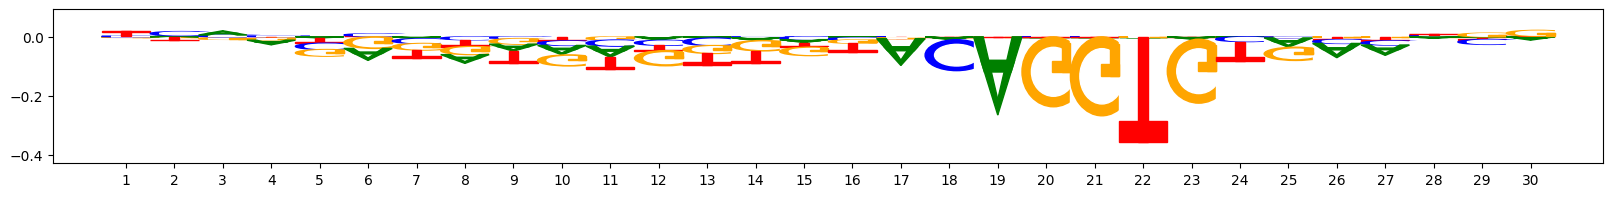

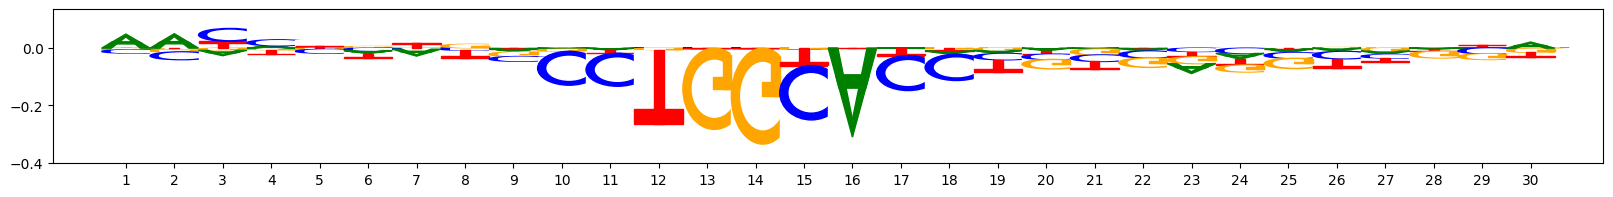

In [7]:
%matplotlib inline
fh = h5.File("/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_HepG2_v1M.h5")

print('Positive patterns:')
try:
    for akey in fh['pos_patterns'].keys():
        vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
except:
    print('No positive patterns')

print('Negative patterns:')
try:
    for akey in fh['neg_patterns'].keys():
        vizsequence.plot_weights(fh['neg_patterns'][akey]['contrib_scores'])
except:
    print('No negative patterns')

fh.close()

###SKNSH

In [8]:
cell_type = 'SKNSH'

contributions_dict = torch.load(f'/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_contributions_{cell_type}.pt')

one = onehots_dict['onehots'].numpy()
hypscores = contributions_dict['hyp_contributions'].numpy()

np.savez('ohe.npz', one)
np.savez('hypscores.npz', hypscores)

In [9]:
%%time
!modisco motifs -s ohe.npz -a hypscores.npz -n 1000000 -o /content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_SKNSH_v1M.h5 -w 200

CPU times: user 2min 15s, sys: 17.3 s, total: 2min 32s
Wall time: 5h 18min 16s


In [10]:
%matplotlib inline
fh = h5.File("/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_SKNSH_v1M.h5")

print('Positive patterns:')
try:
    for akey in fh['pos_patterns'].keys():
        vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
except:
    print('No positive patterns')

print('Negative patterns:')
try:
    for akey in fh['neg_patterns'].keys():
        vizsequence.plot_weights(fh['neg_patterns'][akey]['contrib_scores'])
except:
    print('No negative patterns')

fh.close()

Output hidden; open in https://colab.research.google.com to view.

##Trying different parameters

###HepG2

In [ ]:
%%time
onehots_dict = torch.load('/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_onehots.pt')

cell_type = 'HepG2'

contributions_dict = torch.load(f'/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_contributions_{cell_type}.pt')

one = onehots_dict['onehots'].numpy()
hypscores = contributions_dict['hyp_contributions'].numpy()

np.savez('ohe.npz', one)
np.savez('hypscores.npz', hypscores)

CPU times: user 469 ms, sys: 1.82 s, total: 2.29 s
Wall time: 5.14 s


In [ ]:
%%time
!modisco motifs -s ohe.npz -a hypscores.npz -n 25000 -o /content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_HepG2__25k_100.h5 -w 100

CPU times: user 23 s, sys: 3.06 s, total: 26.1 s
Wall time: 52min 4s


Positive patterns:


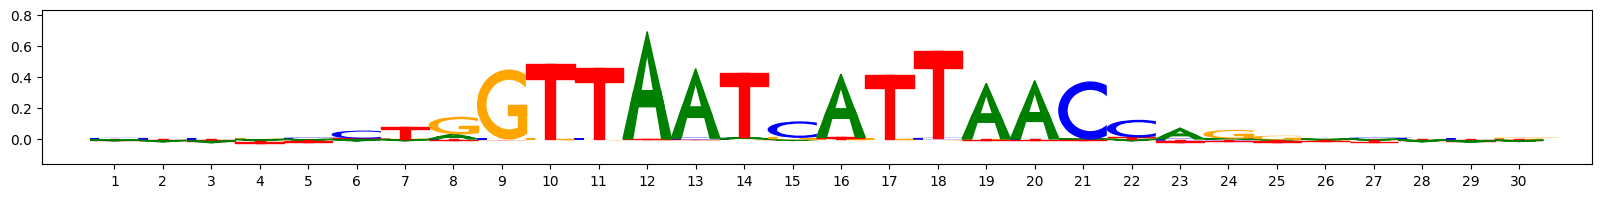

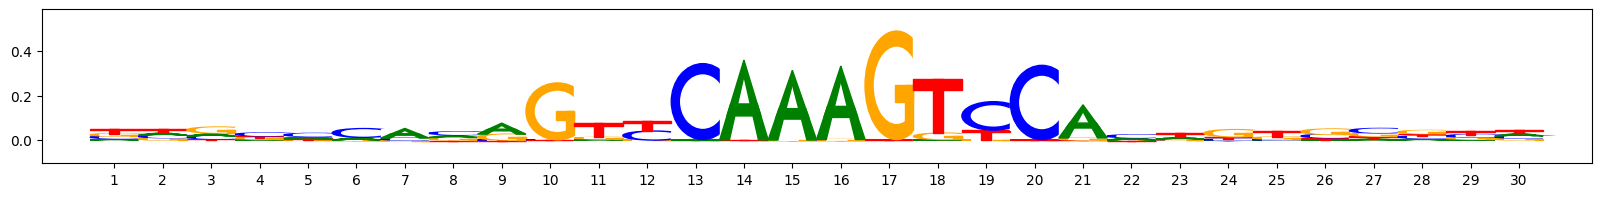

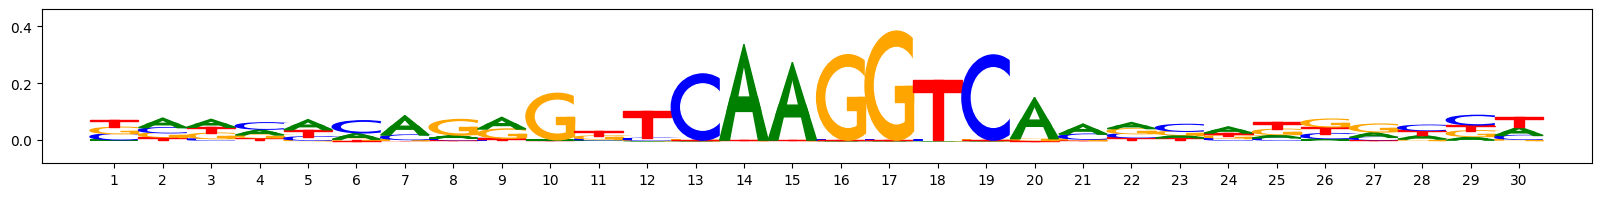

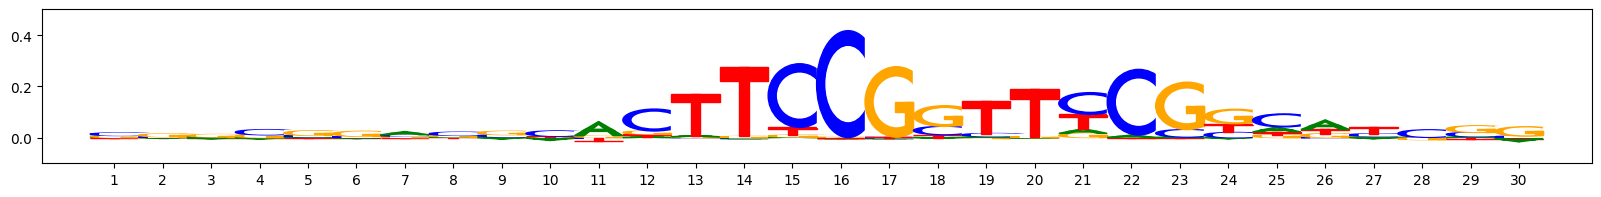

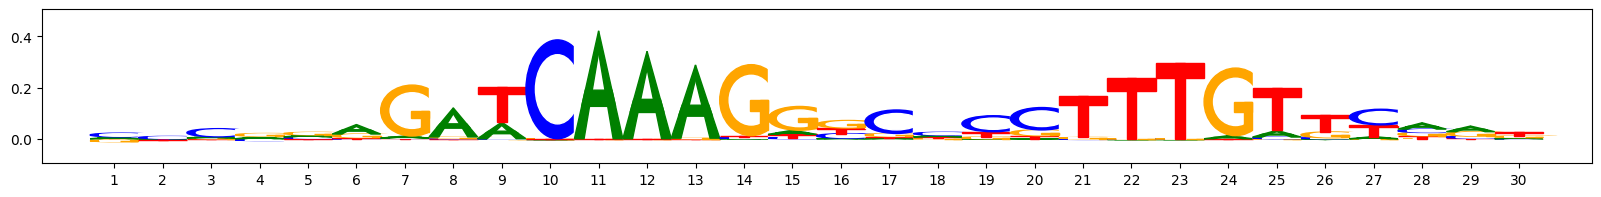

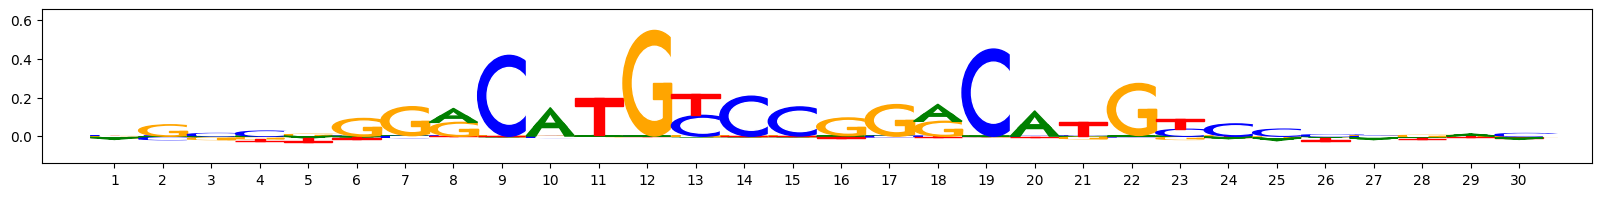

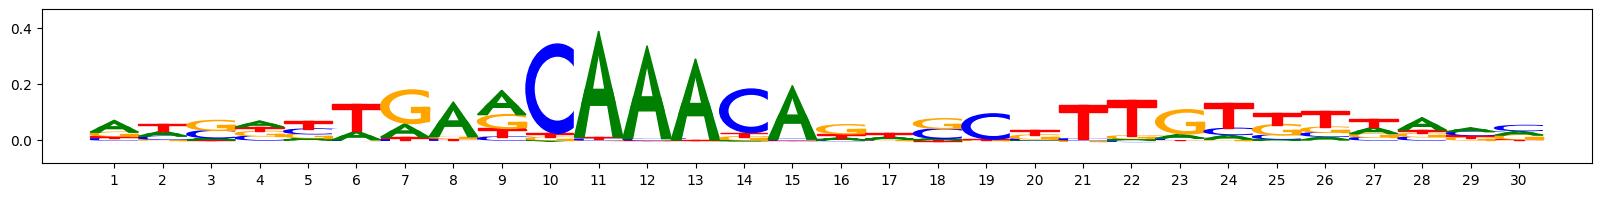

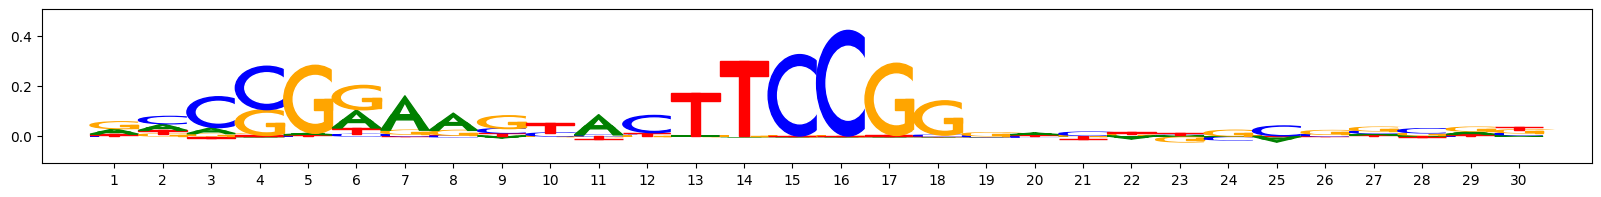

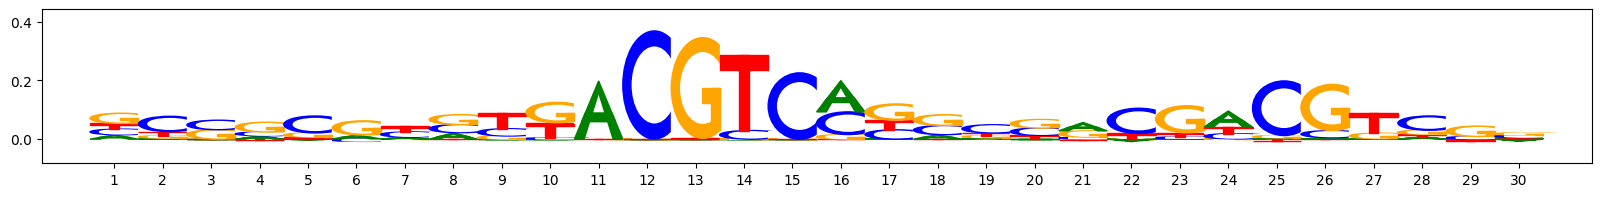

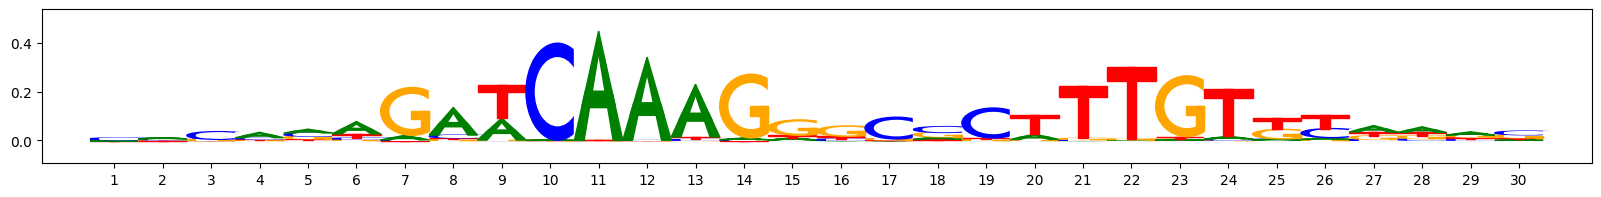

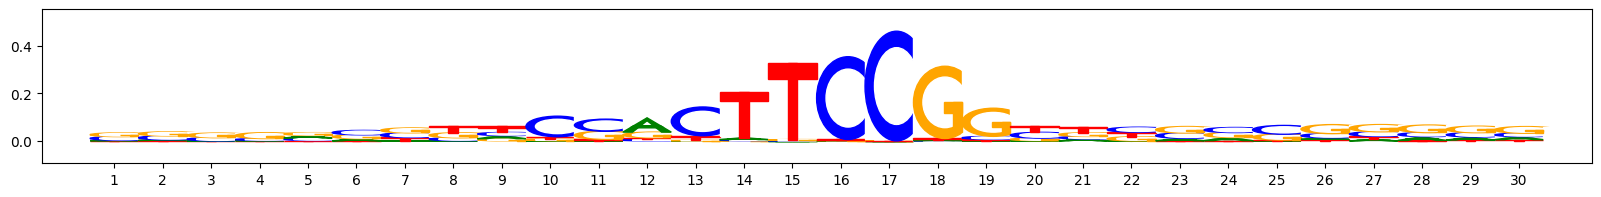

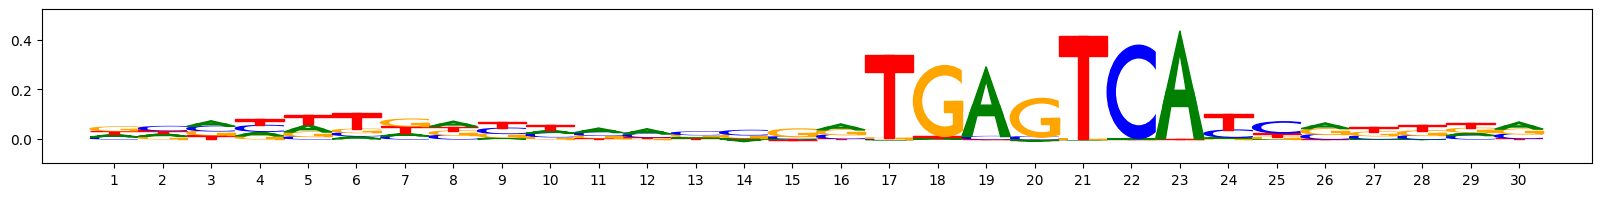

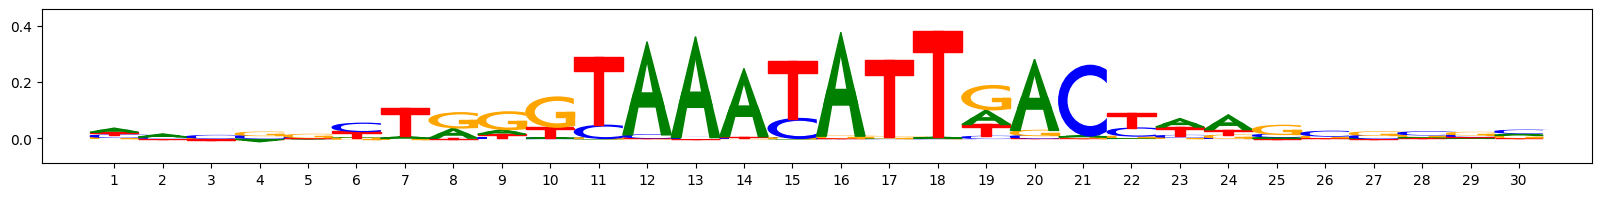

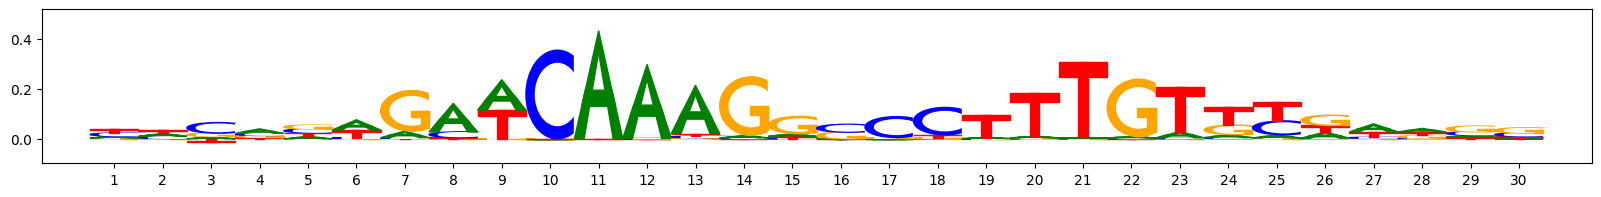

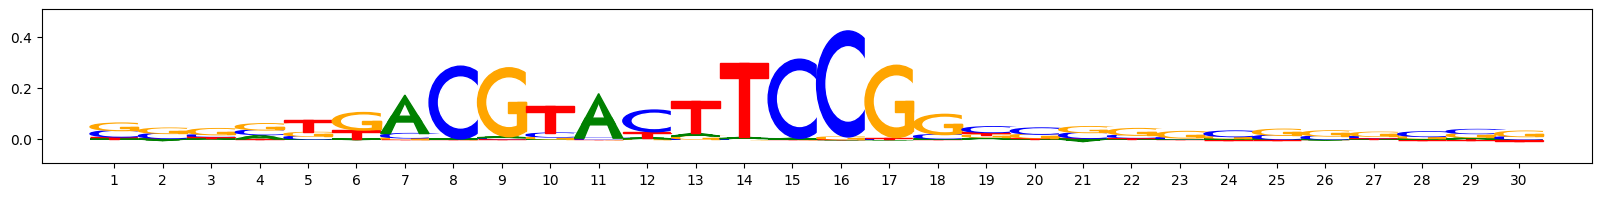

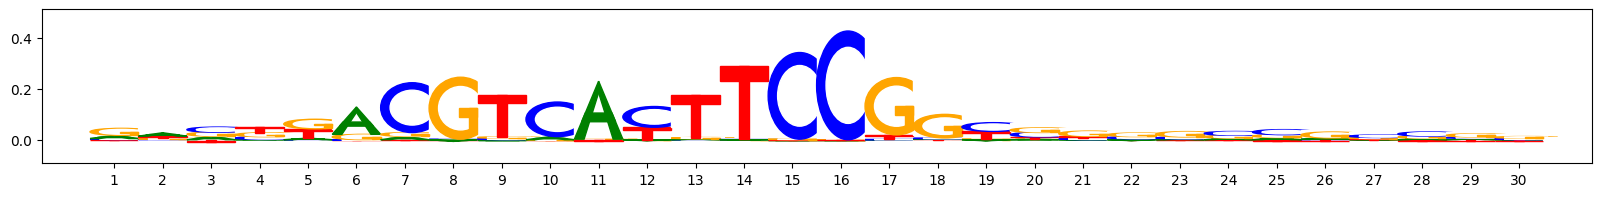

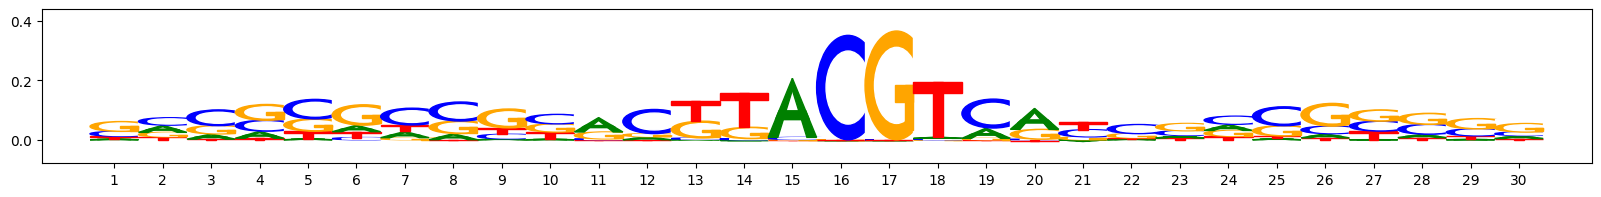

Negative patterns:
No negative patterns


In [ ]:
%matplotlib inline
fh = h5.File("/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_HepG2.h5")

print('Positive patterns:')
try:
    for akey in fh['pos_patterns'].keys():
        vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
except:
    print('No positive patterns')

print('Negative patterns:')
try:
    for akey in fh['neg_patterns'].keys():
        vizsequence.plot_weights(fh['neg_patterns'][akey]['contrib_scores'])
except:
    print('No negative patterns')

fh.close()

##SKNSH

In [ ]:
onehots_dict = torch.load('/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_onehots.pt')

cell_type = 'SKNSH'

contributions_dict = torch.load(f'/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/CODA_contributions_{cell_type}.pt')

one = onehots_dict['onehots'].numpy()
hypscores = contributions_dict['hyp_contributions'].numpy()

np.savez('ohe.npz', one)
np.savez('hypscores.npz', hypscores)

In [ ]:
%%time
!modisco motifs -s ohe.npz -a hypscores.npz -n 150000 -o /content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_SKNSH__150k_200.h5 -w 200

CPU times: user 2min 29s, sys: 20.3 s, total: 2min 49s
Wall time: 5h 28min 35s


In [ ]:
%matplotlib inline
fh = h5.File("/content/drive/MyDrive/data/BODA2_MPRA/CODA_contributions/modisco_results_CODA_SKNSH__150k_200.h5")

print('Positive patterns:')
try:
    for akey in fh['pos_patterns'].keys():
        vizsequence.plot_weights(fh['pos_patterns'][akey]['contrib_scores'])
except:
    print('No positive patterns')

print('Negative patterns:')
try:
    for akey in fh['neg_patterns'].keys():
        vizsequence.plot_weights(fh['neg_patterns'][akey]['contrib_scores'])
except:
    print('No negative patterns')

fh.close()

Output hidden; open in https://colab.research.google.com to view.